In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def first_not_nan(series):
    s = series.dropna()
    return s.iloc[0] if len(s) > 0 else pd.NA


In [18]:
df=pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/src/rhap_sans_hesitation_ni_rep.csv")
df["file_group"] = df["filename"].ffill()
cols = df.columns.drop("filename")

df_clean2 = (
    df
    .groupby("file_group", as_index=False)
    .agg({col: first_not_nan for col in cols})
    .rename(columns={"file_group": "filename"})
)
df_clean2 = df_clean2.dropna(axis=1, how="all")

In [20]:
df_final=pd.concat([df_clean,df_clean1,df_clean2],axis=0)
df_final = df_final.reset_index(drop=True)
df_final = df_final.drop_duplicates()

In [22]:
col = "filename"
df_final = df_final[[col] + [c for c in df_final.columns if c != col]]
#df_clean.to_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/rhap/rhap_sans_hesitation.csv")

In [24]:
df_final.to_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/rhap/rhap_sans_hesitation_ni_rep.csv")

In [25]:
wer_cols = [c for c in df_final.columns if c.startswith("WER")]

wer_means = df_final[wer_cols].mean()

In [34]:
df_final

,filename,duration_sec,samplerate,channels,trans_w2vec_vad_chunk,WER_w2vec_vad_chunk,trans_whisper_vad_chunk,WER_whisper_vad_chunk,trans_whisper_large_vad_chunk,WER_whisper_large_vad_chunk,trans_conf_cv_vad_chunk,WER_conf_cv_vad_chunk,trans_conf_ester_vad_chunk,WER_conf_ester_vad_chunk,trans_hmm_tdnn_vad_chunk,WER_hmm_tdnn_vad_chunk
0,Rhap-D0002.wav,290.229312,16000.0,1.0,J AVAIS LA CHANCE D AVOIR DES ENFANTS QUI TRAV...,26.432749,j avais la chance d avoir des enfants qui trav...,40.584795,j avais la chance d avoir des enfants qui trav...,39.298246,j'avais la chance d'avoir des enfants qui trav...,31.103286,et j'avais la chance d'avoir des enfants qui t...,20.657277,j' avais la chance d' avoir des enfants travai...,25.497076
1,Rhap-D0003.wav,284.962125,16000.0,1.0,R VOUS ÊTES VENUS À PARIS À QUEL ÂGE EH BIEN V...,32.955832,quand vous etes venu a paris a quel age eh bie...,60.135900,par vous etes venu a paris a quel age eh bien ...,49.490374,vous êtes venus à paris à quel âge eh bien voi...,38.844847,quand vous êtes venu à paris à quel âge eh bie...,28.425821,<UNK> vous êtes venu à paris quel âge eh bien ...,31.030578
2,Rhap-D0004.wav,292.681125,16000.0,1.0,EH BIEN ON A TOUJOURS UN PEU CELA QUI VIEILLIS...,25.962488,eh be en a toujours un peu cela qui vieillisse...,49.950642,eh bien on a toujours un peu ceux la qui vieil...,41.164857,et bien on a toujours un peu cela qui vieillis...,36.426456,euh eh ben on a toujours un peu cela qui vieil...,24.580454,eh bien on a toujours un peu cela qui vieillis...,24.679171
3,Rhap-D0005.wav,239.414938,16000.0,1.0,IL A UNA SAFÉ OUI WILWIB AU BAILLEU DE SAINT J...,46.090535,il est il est nomme vous savez qu oui oui oui ...,63.237311,il est ne a mekoumenoumenoumenee a mekoumenoum...,59.122085,un vous savez ah oui oui oui bad au bayeu de s...,54.381085,il y a vous avez bah oui oui oui oui ben euh d...,44.089013,et un j' <UNK> oui oui oui oui dans un bain de...,42.249657
4,Rhap-D0006.wav,366.684875,16000.0,1.0,HONNÊTEMENT PAS VRAIMENT J AI LU O EUH EI MAIS...,29.371981,on n est pas vraiment j ai le nom des hump il ...,41.932367,honnetement pas vraiment j ai le dome est dene...,36.521739,honnêtement pas vraiment ch deux mais je n'ava...,39.766082,honnêtement pas vraiment j'ai peu mais on n'av...,25.536062,honnêtement pas vraiment j' ai <UNK> notre n' ...,30.241546
5,Rhap-D0007.wav,41.664313,16000.0,1.0,AH LA NEF SH AVANT BAALA NOUS SOMMES AU JARDIN...,35.245902,ah l annee suivante bas la nous sommes au jard...,81.967213,ah la nefchevan bas la nous sommes au jardin d...,57.377049,ah nez savants bah là nous sommes au jardin de...,44.262295,ah né chavant ben là nous sommes au germain me...,42.622951,<UNK> amenez savant baleines ça ont jamais <UN...,53.278689
6,Rhap-D0008.wav,201.179563,16000.0,1.0,VOILÀ EN FAIT JE J AURAIS VOULU SAVOIR COMMENT...,38.560886,voila en fait je j aurais voulu savoir comment...,43.173432,voila en fait j aurais voulu savoir comment je...,37.822878,voilà en fait je j'aurais voulu savoir comment...,41.340782,voilà en fait je j'aurais voulu savoir comment...,34.264432,voilà en fait je j' aurais voulu savoir commen...,38.191882
7,Rhap-D0009.wav,310.954187,16000.0,1.0,BON HAUTRE CHOSE ON A NOS NOS CHAISES QUI ONT ...,53.995902,bon autre chose on a nos chaises qui ont besoi...,61.168033,bon autre chose on a nos chaises qui ont besoi...,59.733607,bon autre chose on âme oh nos chaises qui ont ...,60.247168,bon autre chose on a nos nos chaises qui ont b...,54.685891,mais autre chose on a nos nos chefs qui ont be...,56.045082
8,Rhap-D0017.wav,46.396625,16000.0,1.0,OUI PRENEZ À DROITE LA DROITE ET VOUS ALLEZ TO...,18.269231,euh oui prenez a droite la droite et vous alle...,51.923077,eh oui le prenez a droite la droite et vous al...,20.192308,oui prenez à droite la droite et vous allez to...,18.269231,euh oui prenait à droite la droite et vous all...,22.115385,oui prenez à_droite la droite et vous allez to...,25.961538
9,Rhap-D0020.wav,34.764375,16000.0,1.0,OH OUI Y A PLEIN D AUTRES IT

In [26]:
wer_means

WER_w2vec_vad_chunk            24.562856
WER_whisper_vad_chunk           46.49539
WER_whisper_large_vad_chunk    40.918051
WER_conf_cv_vad_chunk          32.231403
WER_conf_ester_vad_chunk       27.284706
WER_hmm_tdnn_vad_chunk         28.532005
dtype: object

In [41]:
import re
import csv
import sys
from pathlib import Path
import os

# Regex to match lines like:
# File: CCM-002710-01_L01.wav | WER=74.874372 | S=80 D=60 I=9
PATTERN = re.compile(
    r"File:\s+(?P<file>\S+)\s+\|\s+"
    r"WER=(?P<wer>[0-9.]+)\s+\|\s+"
    r"S=(?P<s>\d+)\s+D=(?P<d>\d+)\s+I=(?P<i>\d+)"
)

def extract_metrics(log_path, output_csv):
    rows = []

    with open(log_path, "r", encoding="utf-8") as f:
        for line in f:
            match = PATTERN.search(line)
            if match:
                rows.append({
                    "file": match.group("file"),
                    "WER": float(match.group("wer")),
                    "S": int(match.group("s")),
                    "D": int(match.group("d")),
                    "I": int(match.group("i")),
                })

    if not rows:
        print(" No matching lines found in the log.")
        return

    with open(output_csv, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.DictWriter(
            csvfile,
            fieldnames=["file", "WER", "S", "D", "I"]
        )
        writer.writeheader()
        writer.writerows(rows)

    print(f"✅ Extracted {len(rows)} entries into {output_csv}")

extract_metrics("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/whisper_CEREB_vad_chunk.log", "/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/whisper_cereb_vad_chunk.csv")

✅ Extracted 7 entries into /vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/whisper_cereb_vad_chunk.csv


In [67]:
"""df = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/CEREB_conf_rvad.csv")
df["model"] = ["Conformer(cv)"]*len(df)
df["vad"] = ["rvad"]*len(df)
df1 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/CEREB_conf_rvad_ester.csv")
df1["model"] = ["Conformer(ester)"]*len(df1)
df1["vad"] = ["rvad"]*len(df1)
df2 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/hmm_tdnn_CEREB.csv")
df2["model"] = ["HMM_TDNN"]*len(df1)
df2["vad"] = ["None"]*len(df1)
df3 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/CEREB_w2v2.csv")
df3["model"] = ["W2V2"]*len(df1)
df3["vad"] = ["None"]*len(df1)
df4 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/wer_whisper_large-VAD-chunk_CEREB_rvad.csv")
df4["model"] = ["Whisper-large"]*len(df1)
df4["vad"] = ["rvad"]*len(df1)
df5 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/wer_typaloc_CEREB_whisper-VAD-chunk_rvad.csv")
df5["model"] = ["Whisper-medium"]*len(df1)
df5["vad"] = ["rvad"]*len(df1)
df_final1 = pd.concat([df, df1,df2,df3,df4,df5], axis=0, ignore_index=True)"""

In [68]:
"""df = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/CEREB_conf_silero.csv")
df["model"] = ["Conformer(cv)"]*len(df)
df["vad"] = ["silero"]*len(df)
df1 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/CEREB_conf_silero_ester.csv")
df1["model"] = ["Conformer(ester)"]*len(df1)
df1["vad"] = ["silero"]*len(df1)
df2 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/hmm_tdnn_CEREB.csv")
df2["model"] = ["HMM_TDNN"]*len(df1)
df2["vad"] = ["None"]*len(df1)
df3 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/CEREB_w2v2.csv")
df3["model"] = ["W2V2"]*len(df1)
df3["vad"] = ["None"]*len(df1)
df4 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/wer_whisper_large-VAD-chunk_CEREB_silero.csv")
df4["model"] = ["Whisper-large"]*len(df1)
df4["vad"] = ["silero"]*len(df1)
df5 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/wer_typaloc_CEREB_whisper-VAD-chunk_silero.csv")
df5["model"] = ["Whisper-medium"]*len(df1)
df5["vad"] = ["silero"]*len(df1)
df_final2 = pd.concat([df, df1,df2,df3,df4,df5], axis=0, ignore_index=True)"""

In [63]:
"""df = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/conf_tapas_rvad.csv")
df["model"] = ["Conformer(cv)"]*len(df)
df["vad"] = ["rvad"]*len(df)
df1 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/tapas_conf_ester_rvad.csv")
df1["model"] = ["Conformer(ester)"]*len(df1)
df1["vad"] = ["rvad"]*len(df1)
df2 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/hmm_tdnn_tapas.csv")
df2["model"] = ["HMM_TDNN"]*len(df1)
df2["vad"] = ["None"]*len(df1)
df3 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/w2v_tapas.csv")
df3["model"] = ["W2V2"]*len(df1)
df3["vad"] = ["None"]*len(df1)
df4 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/whisper_large_vad_chunk_tapas_rvad.csv")
df4["model"] = ["Whisper-large"]*len(df1)
df4["vad"] = ["rvad"]*len(df1)
df5 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/whisper_vad_chunk_tapas_rvad.csv")
df5["model"] = ["Whisper-medium"]*len(df1)
df5["vad"] = ["rvad"]*len(df1)
df_final1 = pd.concat([df, df1,df2,df3,df4,df5], axis=0, ignore_index=True)"""

In [64]:
"""df = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/conf_tapas_silero.csv")
df["model"] = ["Conformer(cv)"]*len(df)
df["vad"] = ["silero"]*len(df)
df1 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/tapas_conf_ester_silero.csv")
df1["model"] = ["Conformer(ester)"]*len(df1)
df1["vad"] = ["silero"]*len(df1)
df2 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/hmm_tdnn_tapas.csv")
df2["model"] = ["HMM_TDNN"]*len(df1)
df2["vad"] = ["None"]*len(df1)
df3 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/w2v_tapas.csv")
df3["model"] = ["W2V2"]*len(df1)
df3["vad"] = ["None"]*len(df1)
df4 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/whisper_large_vad_chunk_tapas_silero.csv")
df4["model"] = ["Whisper-large"]*len(df1)
df4["vad"] = ["silero"]*len(df1)
df5 = pd.read_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas/whisper_vad_chunk_tapas_silero.csv")
df5["model"] = ["Whisper-medium"]*len(df1)
df5["vad"] = ["silero"]*len(df1)
df_final2 = pd.concat([df, df1,df2,df3,df4,df5], axis=0, ignore_index=True)"""

In [70]:
#df = pd.concat([df_final1,df_final2], axis=0, ignore_index=True)

/tmp/ipykernel_3578902/3002393606.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


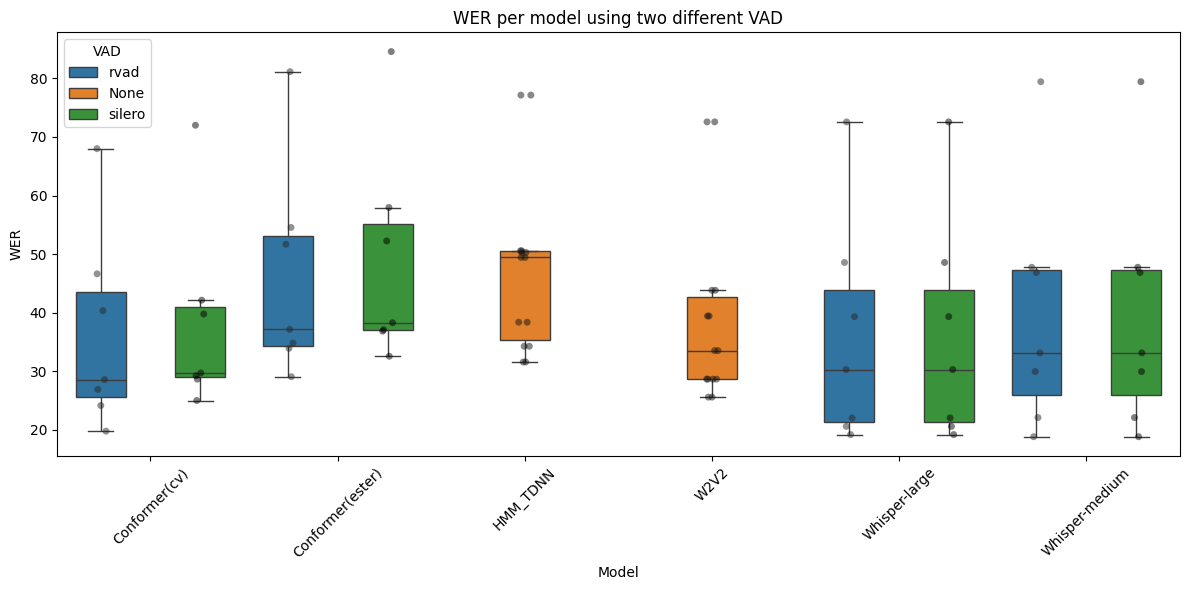

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="model",
    y="WER",
    hue="vad",
    showfliers=False
)

sns.stripplot(
    data=df,
    x="model",
    y="WER",
    hue="vad",
    dodge=True,      # IMPORTANT pour séparer les points
    alpha=0.5,
    color="black"
)

plt.ylabel("WER")
plt.xlabel("Model")
plt.title("WER per model using two different VAD")
plt.xticks(rotation=45)

# ⚠️ éviter la double légende
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:len(set(df.vad))], labels[:len(set(df.vad))], title="VAD")

plt.tight_layout()
plt.savefig("/vol/experiments3/imbenamor/TAPAS-FRAIS/figures/wer_CEREB_plot.png")
plt.show()


In [ ]:
# Ajouter la colonne label
df1["VAD"] = "rvad"
df2["VAD"] = "silero"

# Fusionner (empiler les lignes)
df_final = pd.concat([df1, df2], axis=0, ignore_index=True)

#df_final.to_csv("/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/conf_ester_rhap.csv")


In [23]:
path= "/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc"
csv_files =["w2v_rhap_vad_chunk.csv","whisper_vad-chunk_rhap_rvad.csv","whisper_large-vad-chunk_rhap_rvad.csv","confcv_rhap_vad_chunk.csv","conf_ester_rhap_vad_chunk.csv","hmm_tdnn_rhap_vad_chunk.csv"]
labels = ["W2v2","Whisper-med","whisper-large","Conformer(cv)","Conformer(ester)","Hmm-Tdnn"]
wer_data = []
for ids,f in enumerate(csv_files):
    d=f"Data {ids}"
    d=pd.read_csv(os.path.join(path,f))
    wer_data.append(d["WER"].dropna())

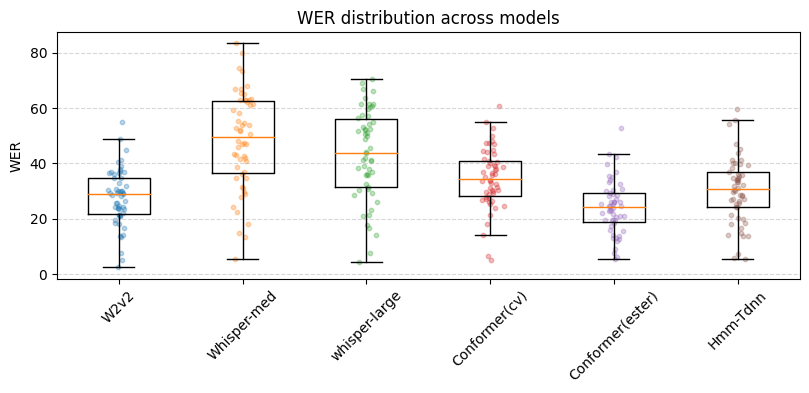

In [24]:
plt.figure(figsize=(8, 3))

# Boxplot
plt.boxplot(wer_data, labels=labels, showfliers=False)

# Overlay data points
for i, values in enumerate(wer_data, start=1):
    x = np.random.normal(i, 0.04, size=len(values))  # jitter
    plt.scatter(x, values, alpha=0.3, s=10)
plt.tight_layout()
plt.ylabel("WER")
plt.xticks(rotation=45)
plt.title("WER distribution across models")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.savefig("/vol/experiments3/imbenamor/TAPAS-FRAIS/figures/wer_rhap_plot.png")
plt.show()


In [10]:
#csv_files=["/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_verified.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/whisper_tapas_verif_vad_chunk.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_whisper_large-tapas.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_vad_whisper_medium.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_whisper_medium.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_hmm_tdnn_rouas.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_conf_ester_rouas.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_conf_cv_rouas.csv"]
#labels = ["Wav2vec", "Whisper-VAD-chunk","Whisper-large-VAD-chunk","Whisper-VAD","Whisper-medium","HMM-TDNN","Conformer(ester)","Conformer(CV)"]
#csv_files=["/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_rhap.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_rhap_whisper_medium.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/whisper_rhap_vad_chunk.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_whisper_large-vad-chunk_rhap.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_hmm_tdnn_rouas.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_rhap_conformer_rouas.csv"]
#labels =["wav2vec","Whisper-medium","Whisper-VAD-chunk","Whisper-large-VAD-chunk","Hmm-TDNN(ester)","Conformer(ester)"]
#csv_files = ["/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_£files/wer_typaloc_CEREB_wav2vec.csv",""]
#labels = ["CEREB"]
path= "/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/tapas"
csv_files =["w2v2_tapas_vad_chunk.csv","whisper_vad_chunk_tapas_rvad.csv","whisper_large_vad_chunk_tapas_rvad.csv","confcv_tapas_vad_chunk.csv","confester_tapas_vad_chunk.csv","hmm_tdnn_tapas_vad_chunk.csv"]
labels = ["W2v2","Whisper-med","whisper-large","Conformer(cv)","Conformer(ester)","Hmm-Tdnn"]
wer_data = []
for ids,f in enumerate(csv_files):
    d=f"Data {ids}"
    d=pd.read_csv(os.path.join(path,f))
    wer_data.append(d["WER"].dropna())

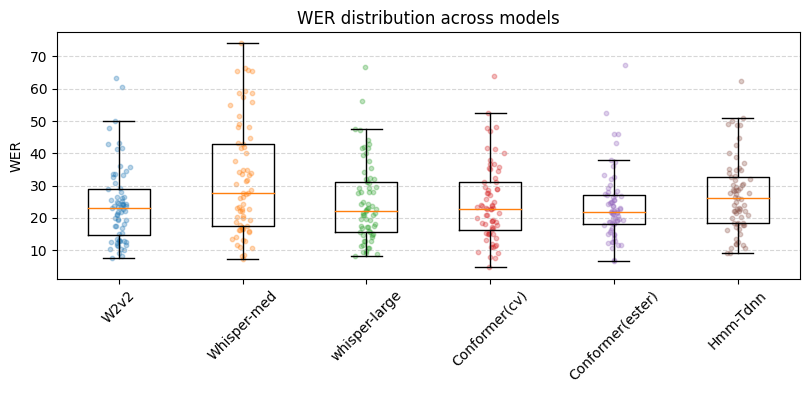

In [18]:
plt.figure(figsize=(8, 3))

# Boxplot
plt.boxplot(wer_data, labels=labels, showfliers=False)

# Overlay data points
for i, values in enumerate(wer_data, start=1):
    x = np.random.normal(i, 0.04, size=len(values))  # jitter
    plt.scatter(x, values, alpha=0.3, s=10)
plt.tight_layout()
plt.ylabel("WER")
plt.xticks(rotation=45)
plt.title("WER distribution across models")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.savefig("/vol/experiments3/imbenamor/TAPAS-FRAIS/figures/wer_tapas_plot.png")
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

experiments = ["W2V2", "Whisper-med","Whisper-large","Conformer(cv)","Conformer(ester)","Hmm_tdnn"]
datasets = ["CEREB", "PARK", "SLA", "CTR"]
folder_path="/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/typaloc/"
files = {
    "W2V2": [folder_path+"w2v_cereb_vad_chunk.csv", folder_path+"w2v_park_vad_chunk.csv", folder_path+"w2v_SLA_vad_chunk.csv", folder_path+"w2v_ctrl_vad_chunk.csv"],
    "Whisper-med": [folder_path+"whisper_cereb_vad_chunk.csv",folder_path+"whisper_PARK_VAD_chunk_rvad.csv",folder_path+"whisper_SLA_vad_chunk_rvad.csv",folder_path+"whisper_vad_chunk_CTRL_rvad.csv"],
    "Whisper-large":[folder_path+"wer_whisper_large-VAD-chunk_CEREB_rvad.csv",folder_path+"wer_whisper_large-VAD-chunk_PARK_rvad.csv",folder_path+"wer_whisper_large-VAD-chunk_SLA_rvad.csv",folder_path+"wer_whisper_large-vad-chunk_CTRL_rvad.csv"],    
    "Conformer(cv)":[folder_path+"confcv_cereb_vad_chunk.csv",folder_path+"confcv_park_vad_chunk.csv",folder_path+"confcv_sla_vad_chunk.csv",folder_path+"confcv_ctrl_vad_chunk.csv"],
    "Conformer(ester)":[folder_path+"conf_ester_cereb_vad_chunk.csv",folder_path+"conf_ester_park_vad_chunk.csv",folder_path+"conf_ester_sla_vad_chunk.csv",folder_path+"conf_ester_ctrl_vad_chunk.csv"],
    "Hmm_tdnn":[folder_path+"hmm_tdnn_CEREB_vad_chunk.csv",folder_path+"hmm_tdnn_PARK_vad_chunk.csv",folder_path+"hmm_tdnn_SLA_vad_chunk.csv",folder_path+"hmm_tdnn_ctrl_vad_chunk.csv"]
}

# Load data
data = {}
for exp in experiments:
    data[exp] = []
    for f in files[exp]:
        df = pd.read_csv(f)
        data[exp].append(df["WER"].dropna().values)



In [32]:
big_mat.shape

(39, 6)

[[23.976608 22.59887  20.588235 23.976608 33.918129 33.333333]
 [23.595506 27.272727 19.186047 22.674419 32.58427  41.011236]
 [26.966292 32.36715  22.033898 33.146067 33.707865 31.460674]
 [29.714286 35.449735 30.285714 26.285714 33.714286 49.142857]
 [32.20339  47.668394 48.571429 35.59322  50.282486 57.062147]
 [41.573034 52.631579 39.325843 49.438202 51.685393 55.05618 ]
 [64.571429 81.642512 72.571429 63.428571 76.571429 81.714286]]
[[14.689266 24.293785 12.429379 18.079096 27.683616 24.293785]
 [19.774011 17.514124 19.774011 23.163842 27.683616 31.638418]
 [31.578947 33.333333 28.654971 41.520468 33.333333 32.163743]
 [42.372881 31.073446 32.768362 37.853107 53.107345 45.19774 ]
 [35.795455 63.068182 57.386364 36.931818 45.454545 42.045455]
 [46.857143 48.       36.571429 37.142857 62.857143 53.142857]
 [29.189189 76.271186 73.446328 56.216216 50.27027  43.243243]
 [55.357143 77.380952 61.904762 50.595238 62.5      70.833333]]
[[ 17.514124  24.712644  25.862069  18.644068  32.203

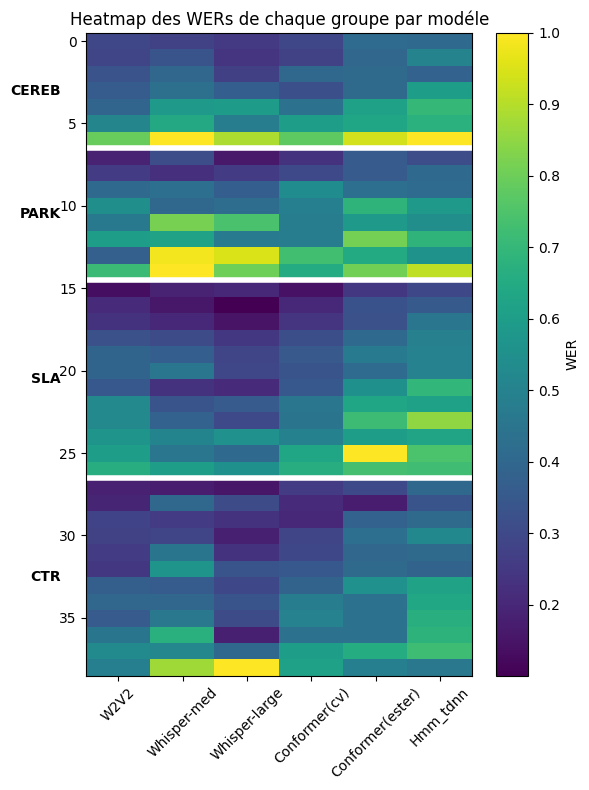

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Build one big matrix
all_rows = []
row_labels = []
dataset_boundaries = []

row_count = 0

for d_idx, dataset in enumerate(datasets):
    # matrix: samples × experiments
    mat = np.column_stack([
    data[exp][d_idx] for exp in experiments
    ])

    # 🔽 SORT HERE (low → high mean WER)
    order = np.argsort(mat.mean(axis=1))
    mat = mat[order]
    

    all_rows.append(mat)

    # labels (optional: file index)
    row_labels.extend([f"{dataset}_s{i}" for i in range(mat.shape[0])])

    row_count += mat.shape[0]
    dataset_boundaries.append(row_count)
for i,d in enumerate(all_rows):
    print(d)
    all_rows[i]=d/d.max()
# Concatenate everything
big_mat = np.vstack(all_rows)

# Plot
plt.figure(figsize=(6, 8))
im = plt.imshow(big_mat, aspect="auto", cmap="viridis")
start = 0
for d_idx, dataset in enumerate(datasets):
    n_rows = all_rows[d_idx].shape[0]
    center = start + n_rows / 2 - 0.5

    plt.text(
        -0.9, center, dataset,
        va="center", ha="right",
        fontsize=10, fontweight="bold"
    )

    start += n_rows

plt.xticks(range(len(experiments)), experiments, rotation=45)
#plt.ylabel("Groupes")
plt.title("Heatmap des WERs de chaque groupe par modéle")

# Dataset separators
for y in dataset_boundaries[:-1]:
    plt.axhline(y - 0.5, color="white", linewidth=4)

plt.colorbar(im, label="WER")
plt.savefig("/vol/experiments3/imbenamor/TAPAS-FRAIS/figures/typaloc_heatmap_normalized_group.png")

plt.tight_layout()
plt.show()


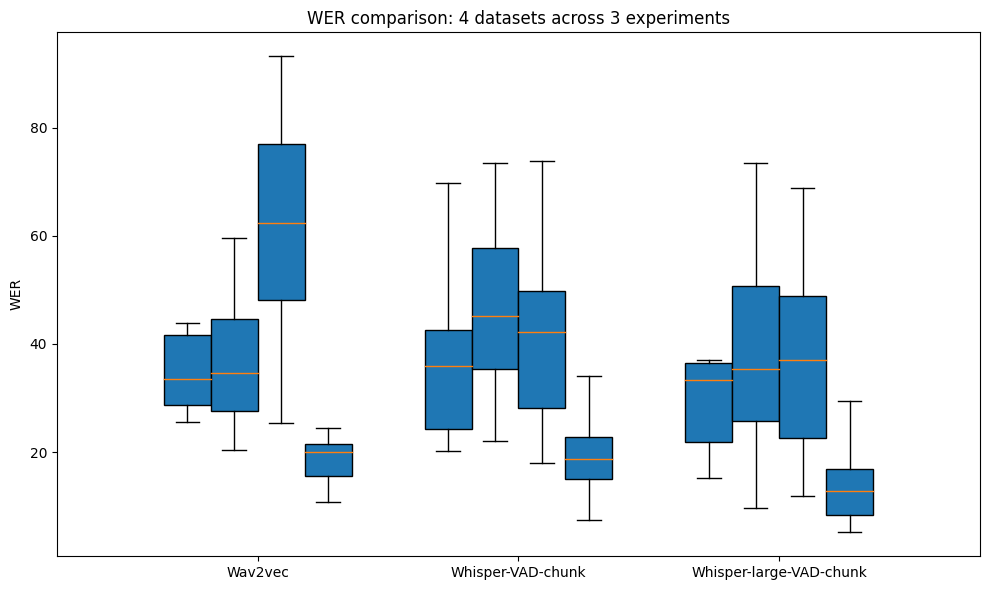

In [5]:
# Plot
plt.figure(figsize=(10, 6))

n_datasets = len(datasets)
width = 0.18
x = np.arange(len(experiments))

for i in range(n_datasets):
    plt.boxplot(
        [data[exp][i] for exp in experiments],
        positions=x + i * width,
        widths=width,
        patch_artist=True,
        showfliers=False
    )

# X-axis formatting
plt.xticks(x + width * (n_datasets - 1) / 2, experiments, rotation=0)
plt.ylabel("WER")
plt.title("WER comparison: 4 datasets across 3 experiments")

plt.tight_layout()
plt.show()
